
## The Schrödinger Equation


The Schrödinger equation is a partial differential equation that describes how the wavefunction of a physical system evolves over time, that is, it predicts probability at a quantum scale. It is the fundamental equation of physics for describing quantum mechanical behavior.  It is used to find the allowed energy levels of quantum mechanical systems (such as atoms, or transistors). The associated wavefunction gives the probability of finding the particle at a certain position. The Schroedinger equation for a particle’s wave function is $$ \frac{\partial^2 \psi  }{\partial x^2} = \frac{-2m}{ \hbar}[E-V(x)] \psi (x)$$

## Infinite Square Well/Particle In a Box



<img src="files/img.png" style = "width:200px;height:200px"/>

image source: https://commons.wikimedia.org/w/index.php?curid=7699138


L is the length of the box. V is defined to be 0 within the box, and infinity outside. The wavefunction outside the box must equal 0 then. We can then solve Schroedinger's equation analytically using this model. 

Inside the region from zero to a, the wavefunction must be a solution of $$ -\frac{ \hbar ^2 }{2m}  \frac{\partial^2 \psi(x)  }{\partial x^2} = E \psi (x)$$

The solution to this diffrential equation is $$ \psi(x) =  Ae^{ikx}+Be^{ikx}$$ $$k = \frac{\sqrt{2mE}}{ \hbar ^2 }$$


Now we need to apply boundary conditions. $$\psi(0) = \psi(L) = 0$$
                                          $$0 =  Ae^{ik0}+Be^{ik0} \rightarrow A = - B$$
                                          $$Ae^{ikx}-Ae^{ikx} = Asin(kx)$$
                                          $$ \psi(L) =  Asin(kL)$$
                                          $$kL = n\pi, n = 0,1,2,3...  \rightarrow k = \frac{n\pi}{L} $$
                                      
                                          


Thus,$$\psi(x) =  Asin(\frac{n\pi}{L}x), n = 1,2,3$$

Now we normalize the solution, and solve for A:   
$$ \intop\nolimits_{- \infty }^{ \infty }  \begin{vmatrix}\psi(x)\end{vmatrix}^2 dx = \intop\nolimits_{0}^{L}\begin{vmatrix}A\end{vmatrix}^2 sin^2(\frac{n\pi}{L}x)xdx = 1$$

$$\begin{vmatrix}A\end{vmatrix}\frac{L}{2} = 1   \rightarrow  A = \sqrt{\frac{L}{2}}$$


Finally, then, 
$$\psi(x) =  \sqrt{\frac{L}{2}}sin(\frac{n\pi}{L}x), n = 1,2,3 $$

Since $k = \frac{\sqrt{2mE}}{ \hbar ^2 } = \frac{n\pi}{L}$, we can solve for E, and find that the allowable values of the energy are $$E = \frac{n^2\pi^2\hbar^2}{2mL^2}, n = 1,2,3$$ 

## Graphing the Wave Function and Probability Density Function

Electron in a 1nm Infinite Square Well
Mass = 9.11e-31 kg
Energy Level = 2 
Box Length = 1e-09 meters
Energy = 1.504 eV


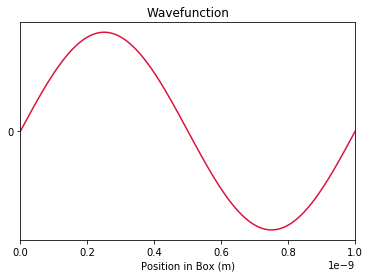

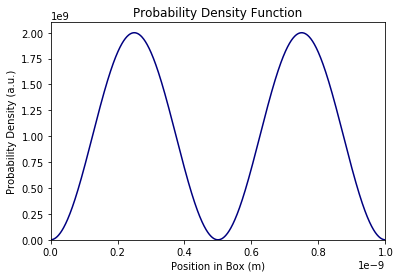

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.62607004e-34  #Planck Constant
E = ((h**2)*(6.24e18))/8  #h^2*(conversion from J to eV)/8
#m = Mass in kg
#L = Length of box in meters
#n = Energy Level = Principal Quantum Number

def psi(n,x,L):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)  #Normalized 1D Wavefunction

def energy(n,m,L):
    return ((n/L)**2*E)/m  #Returns energies in eV

def wavefunction(n,L):
    X = np.linspace(0,L,1000)
    wav = psi(n,X,L)
    plt.figure(0)
    plt.plot(X,wav,'crimson')
    plt.xlim(0,L)
    plt.title("Wavefunction")
    plt.xlabel("Position in Box (m)")
    plt.yticks([0])

def probability(n,L):
    X = np.linspace(0,L,1000)
    prob = (psi(n,X,L))**2
    plt.figure(1)
    plt.plot(X,prob,'navy')
    plt.xlim(0,L)
    plt.ylim(0)
    plt.title("Probability Density Function")
    plt.xlabel("Position in Box (m)")
    plt.ylabel("Probability Density (a.u.)")

def quantum_properties(n,m,L):
    en = round(energy(n,m,L),3)
    print("Mass =",m,"kg\nEnergy Level =",n,"\nBox Length =",L,"meters\nEnergy =",en,"eV")
    wavefunction(n,L)
    probability(n,L)

print("Electron in a 1nm Infinite Square Well")
quantum_properties(2,9.11e-31,1e-9)

## Finding a Numerical Solution

Box length = 1 m


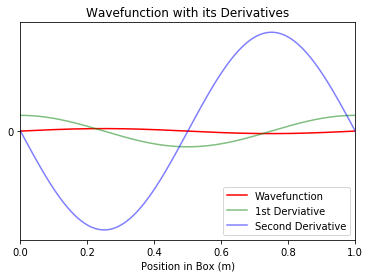

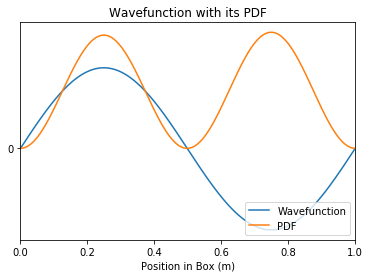

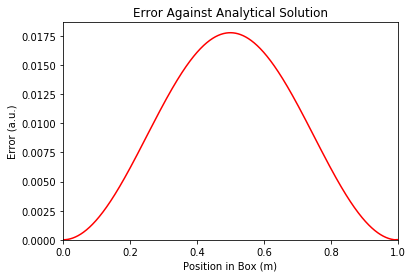

In [5]:
def Numerical_Solns(n,L):
    
    N = 1000                                                                #Of points to test
    norm = np.sqrt(2/L)                                                     #Normalization
    dx = n*np.pi/N                                                          #delta x
    x = [0]                                                                 #Initial conditions
    ps = [0]                                                                #^
    ps1 = [norm]                                                            #^
    ps2 = [0]                                                               #^
    
    for i in range(0,N):                                                    #[LÖÖP]
        p2 = ps2[-1] - ps1[-1]*dx                                           #Determining next 2nd Derivative value
        p1 = ps1[-1] + p2*dx                                                #Determining next 1st Derivative value
        p =  ps[-1]  + p1*dx                                                #Determining next Psi value
        px = x[-1] + L/N                                                    #Determining next X value
        ps.append(p)                                                        #Adding values to lists
        ps1.append(p1)                                                      #^
        ps2.append(p2)                                                      #^
        x.append(px)                                                        #^

    xa = np.array(x)                                                        #Converting lists to Numpy arrays
    psi = np.array(ps)                                                      #^
    psi1 = np.array(ps1)                                                    #^
    psi1 = psi1*n*np.pi/L                                                   #^
    psi2 = np.array(ps2)                                                    #^
    psi2 = psi2*((n*np.pi/L)**2)                                            #^
    analytical = norm*np.sin(n*np.pi*xa/L)                                  #Analytical Soln

    return xa, psi, psi1, psi2, analytical

def Plot_Solns(n,L):
    N = 1000                                                                #Of points to test
    x, psi, psi1, psi2, analytical = Numerical_Solns(n,L)
    print("Box length =",L,"m")
    
    plt.figure(0)                                                           #Plotting Wavefunction against its derivatives
    plt.plot(x,psi,'r',label=psi)
    plt.plot(x,psi1,'g',label=psi1,alpha=0.5)
    plt.plot(x,psi2,'b',label=psi2,alpha=0.5)
    plt.legend(["Wavefunction","1st Derviative","Second Derivative"],loc=4)
    plt.title("Wavefunction with its Derivatives")
    plt.xlim(0,L)
    plt.xlabel("Position in Box (m)")
    plt.yticks([0])
    
    PDF = psi**2
    
    plt.figure(1)                                                           #Plotting Wavefunction against its PDF
    plt.plot(x,psi)
    plt.plot(x,PDF)
    plt.xlim(0,L)
    plt.legend(["Wavefunction","PDF"],loc=4)
    plt.title("Wavefunction with its PDF")
    plt.xlabel("Position in Box (m)")
    plt.yticks([0])
    
    Error = np.abs(analytical - psi)
    
    plt.figure(2)                                                           #Plotting numerical's error against analytical
    plt.plot(x,Error,'r')
    plt.title("Error Against Analytical Solution")
    plt.xlim(0,L)
    plt.xlabel("Position in Box (m)")
    plt.ylabel("Error (a.u.)")
    plt.ylim(0)

h = 6.62607004e-34  #Planck Constant                                        #Constants
E = ((h**2)*(6.24e18))/8  #h^2*(conversion from J to eV)/8

def Analytical_energy(n,m,L):
    return ((n/L)**2*E)/m  #Returns energies in eV

def Energies(n,L,m):
    
    N = 1000                                                                #Of points to test
    # n = Principal Quantum Number
    # L = Length of Box in meters
    # m = Mass of Particle in kg
    
    hbar = 1.0546e-34 #J/s                                                  #Constants
    k = hbar**2*6.242e18/(2*m)
    
    Energy = []                                                             #Empty Lists
    ns = []
    Error = []
    
    print("Particle mass =",m,"kg")
    print("Box length =",L,"m")
    
    for i in range(0,n):
        _, psi, _, psi2, _ = Numerical_Solns(i+1,L)
        
        E = (sum(abs(psi2))/sum(abs(psi)))/len(psi)
        E = E*k*N
        Energy.append(E)
        ns.append(i+1)
        AE = Analytical_energy(i+1,m,L)
        Err = np.abs((E-AE)/AE)*100
        Error.append(Err)
    
    plt.figure(0)                                                           #Plotting energies
    plt.plot(ns,Energy)
    plt.title("Energies in a 1D Infinite Square Well")
    plt.xlabel("Energy Level")
    plt.ylabel("Energy (eV)")
    plt.xticks(np.arange(1, n+1, step=1))
    plt.ylim(0)
    
    plt.figure(1)                                                           #Plotting errors
    plt.plot(ns,Error,'r')
    plt.title("Errors Against Analytical Energies")
    plt.xlabel("Energy Level")
    plt.ylabel("Error (%)")
    plt.xticks(np.arange(1, n+1, step=1))
    plt.ylim(0)

Plot_Solns(2,1)

Particle mass = 9.11e-31 kg
Box length = 1e-09 m


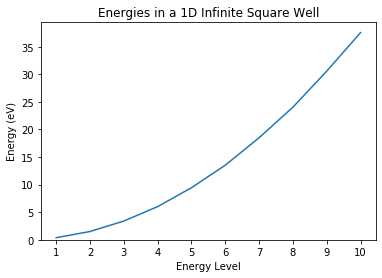

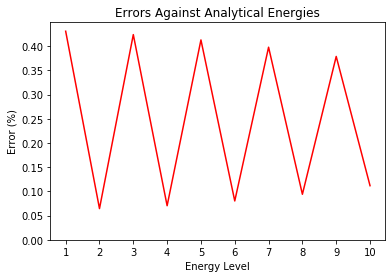

In [6]:
Energies(10,1e-9,9.11e-31)

## Animating the Wave Function



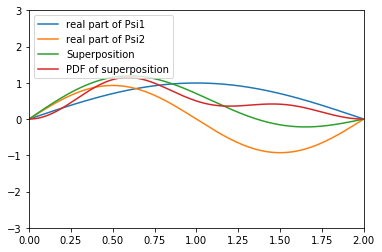

In [3]:
from matplotlib import animation
from IPython.display import HTML
a = 2
fig = plt.figure()
ax = plt.axes(xlim=(0, a), ylim=(-3, 3))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)]


#This basically creates an empty "line object" that we'll fill with (x,y) values in the animate() function

def init():    
    for line in lines:
        line.set_data([], [])
    return lines


def animate(i):
    x = np.linspace(0, 2, 1000)

    # psi1 is normalized naturally

    psi1 = np.sin((np.pi*x)/2)*np.cos(i/16)

    # psi2 is normalized naturally
    # psi2_real = np.sin(np.pi*x)
    psi2 = np.sin(np.pi*x)*np.cos(i/4)

    # normalization for psi 2
    # psi2 = psi2 / np.linalg.norm(psi2)
    
    # Psi_real = psi1_real + psi2_real
    # normalization for Psi
    Psi = (psi1 + psi2)/np.sqrt(2)
    
    # Psi = Psi / np.linalg.norm(Psi)

    Psi_squared = (np.sin((np.pi*x)/2))**2+(np.sin(np.pi*x))**2+(np.sin((np.pi*x)/2))*(np.sin(np.pi*x))*np.cos((3/16)*i)
    Psi_squared = Psi_squared/2
    # Psi_squared = Psi_squared / np.linalg.norm(Psi_squared)
    
    # change all the arrays into list
    psi1 = psi1.tolist()
    psi2 = psi2.tolist()
    Psi = Psi.tolist()
    Psi_squared = Psi_squared.tolist()

    lines[0].set_data(x, psi1)
    lines[0].set_label('real part of Psi1')
    lines[1].set_data(x, psi2)
    lines[1].set_label('real part of Psi2')
    lines[2].set_data(x, Psi)
    lines[2].set_label('Superposition')
    lines[3].set_data(x, Psi_squared)
    lines[3].set_label('PDF of superposition')

    plt.legend(loc='upper left')

    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_jshtml())
# plt.show()
